### <p style="text-align: right;"> &#9999; Krrish Kishore Kumar</p>


# 21D - Data Analysis 

### Data Transforming

We want to examine which wards need the most urgent assistance. In other words, which ones have the most tests that fail the EPA's guideline threshold. How can you add a file to the dataframe that reflect the values in milligrams per liter (mg/L) to make a quick comparison with the EPA guidelines?

*Note*: 1 part-per-million, or 1ppm, equals 1 milligram per liter (1mg/L)

Review this unit conversion:

$$ x \text{ ppb} \times \frac{1 \text{ ppm}}{1000 \text{ ppb}} \times \frac{1 \text{ mg/L}}{1 \text{ ppm}} $$

Would this give you the units that you want? Is there an easier method?

In [1]:
# Write you code here to add a new column that shows the converted values.
# once you are sure it works, do it for all three lead columns.

import pandas as pd
import numpy as np
import seaborn as sns

flint = pd.read_csv('/workspaces/codespaces-jupyter/data/flint.csv')
flint.insert(4, "Pb Bottle 1 in mg/L", flint["Pb Bottle 1 (ppb) - First Draw"]/1000)
flint

,SampleID,Zip Code,Ward,Pb Bottle 1 (ppb) - First Draw,Pb Bottle 1 in mg/L,Pb Bottle 2 (ppb) - 45 secs flushing,Pb Bottle 3 (ppb) - 2 mins flushing,Notes
0,1,48504,6,0.344,0.000344,0.226,0.145,NaN
1,2,48507,9,8.133,0.008133,10.770,2.761,NaN
2,4,48504,1,1.111,0.001111,0.110,0.123,NaN
3,5,48507,8,8.007,0.008007,7.446,3.384,NaN
4,6,48505,3,1.951,0.001951,0.048,0.035,NaN
...,...,...,...,...,...,...,...,...
266,295,48503,7,18.110,0.018110,20.210,4.263,NaN
267,296,48503,7,12.810,0.012810,7.874,1.780,NaN
268,298,48503,7,1.083,0.001083,0.322,0.260,NaN
269,299,48503,7,29.590,0.029590,3.258,1.843,NaN


In [2]:
flint.insert(6, "Pb Bottle 2 in mg/L", flint["Pb Bottle 2 (ppb) - 45 secs flushing"]/1000)
flint.insert(8, "Pb Bottle 3 in mg/L", flint["Pb Bottle 3 (ppb) - 2 mins flushing"]/1000)
flint

,SampleID,Zip Code,Ward,Pb Bottle 1 (ppb) - First Draw,Pb Bottle 1 in mg/L,Pb Bottle 2 (ppb) - 45 secs flushing,Pb Bottle 2 in mg/L,Pb Bottle 3 (ppb) - 2 mins flushing,Pb Bottle 3 in mg/L,Notes
0,1,48504,6,0.344,0.000344,0.226,0.000226,0.145,0.000145,NaN
1,2,48507,9,8.133,0.008133,10.770,0.010770,2.761,0.002761,NaN
2,4,48504,1,1.111,0.001111,0.110,0.000110,0.123,0.000123,NaN
3,5,48507,8,8.007,0.008007,7.446,0.007446,3.384,0.003384,NaN
4,6,48505,3,1.951,0.001951,0.048,0.000048,0.035,0.000035,NaN
...,...,...,...,...,...,...,...,...,...,...
266,295,48503,7,18.110,0.018110,20.210,0.020210,4.263,0.004263,NaN
267,296,48503,7,12.810,0.012810,7.874,0.007874,1.780,0.001780,NaN
268,298,48503,7,1.083,0.001083,0.322,0.000322,0.260,0.000260,NaN
269,299,48503,7,29.590,0.029590,3.258,0.003258,1.843,0.001843,NaN


____

### Visualizing and Intrepreting the Distribution of the Data 

As a reminder, here's what the EPA guidelines say:

> Lead and copper are regulated by a treatment technique that requires systems to control the corrosiveness of their water. If more than 10% of tap water samples exceed the action level, water systems must take additional steps. For copper, the action level is 1.3 mg/L, and for lead is 0.015 mg/L. 

<img src="https://www.simplypsychology.org/wp-content/uploads/box-whisker-plot.jpg" width=500px>



**Use masks to make boxplots showing the distribution of lead levels in Test3 for the nine different wards** (it may help to use the the [Seaborn gallery](https://seaborn.pydata.org/examples/index.html)).



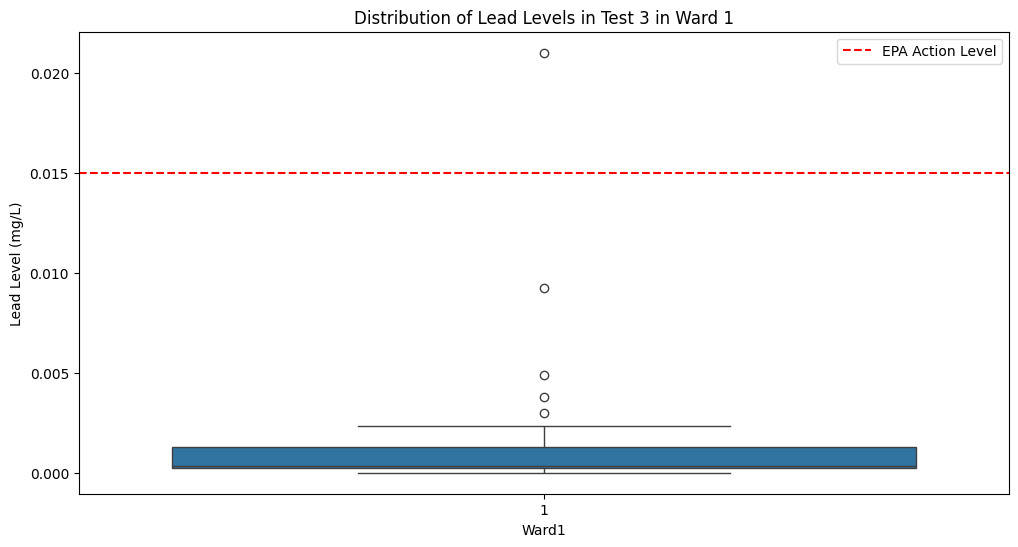

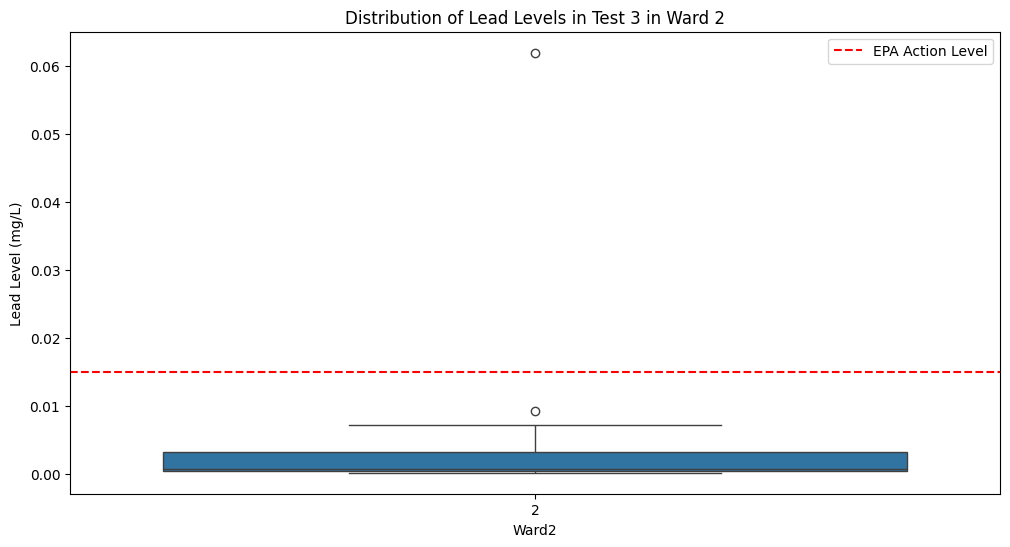

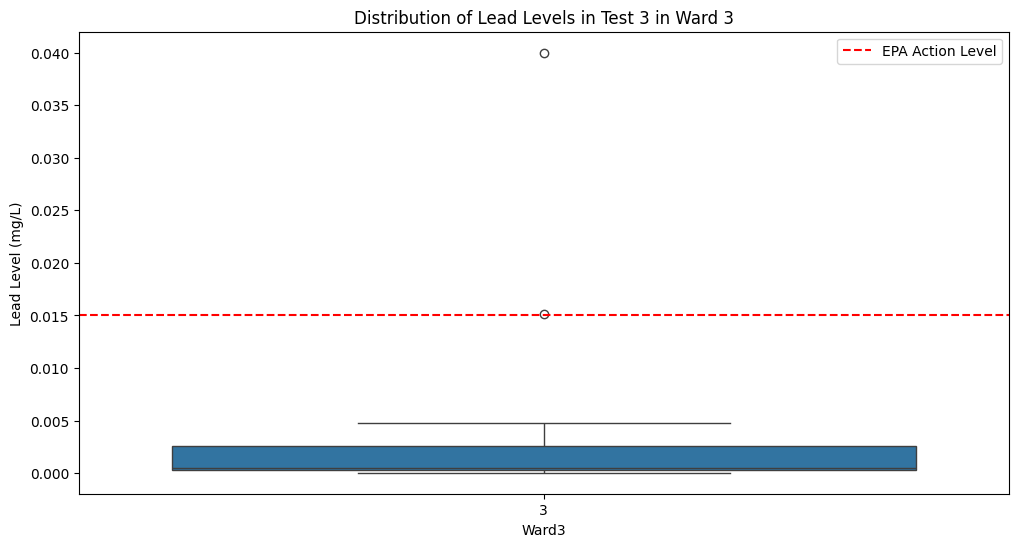

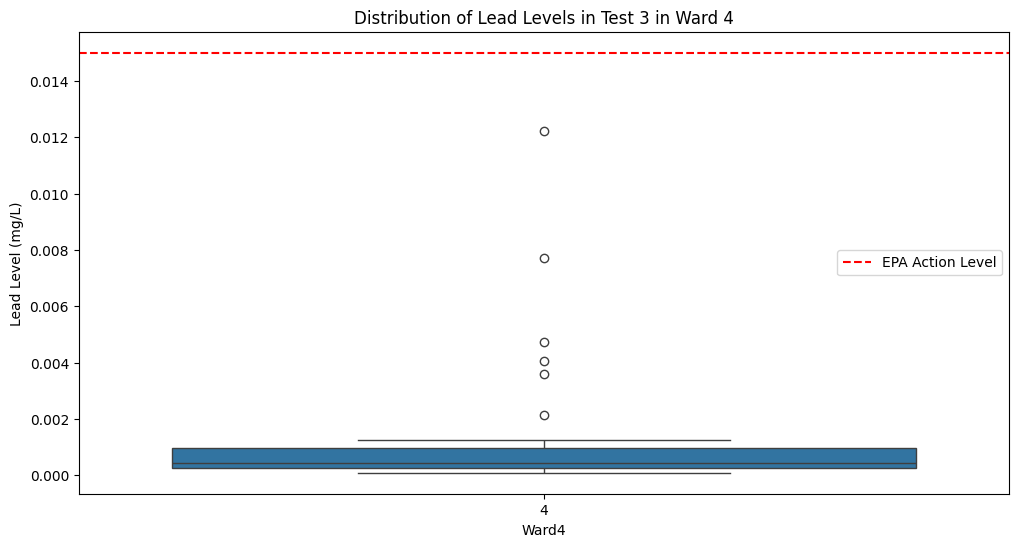

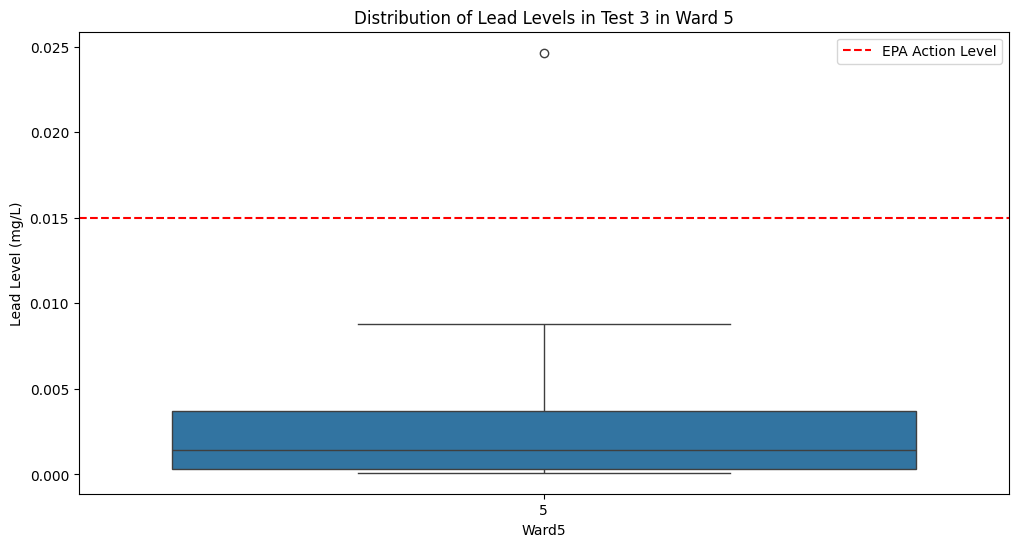

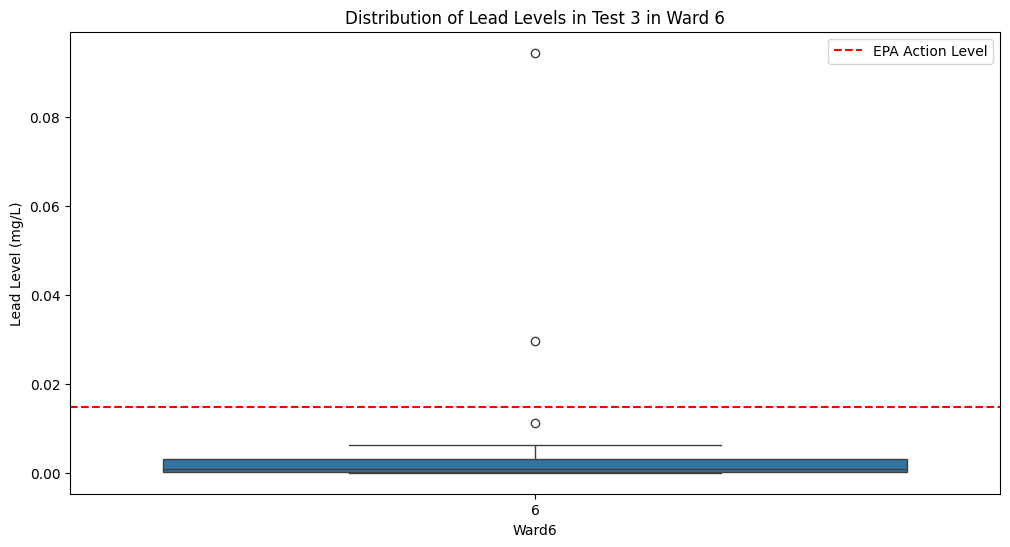

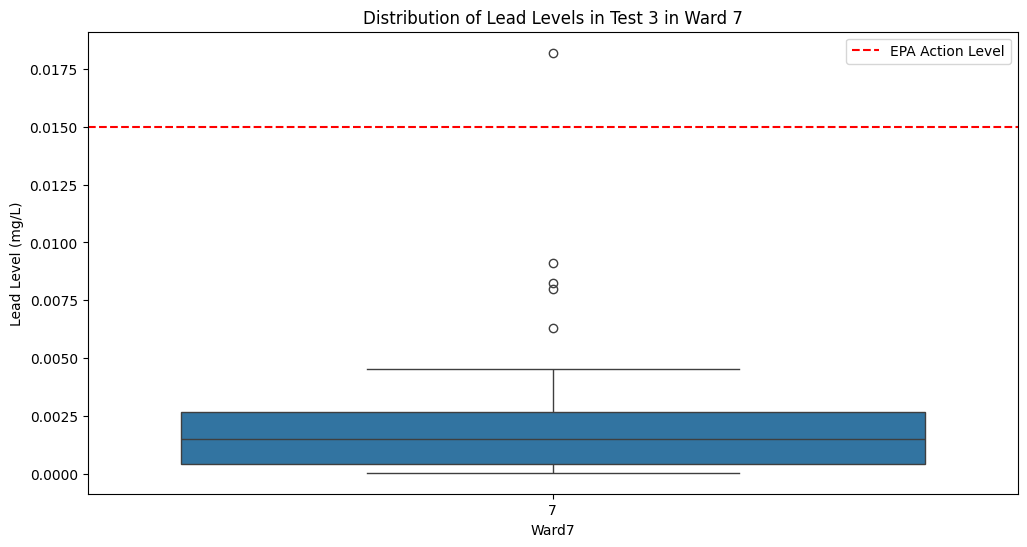

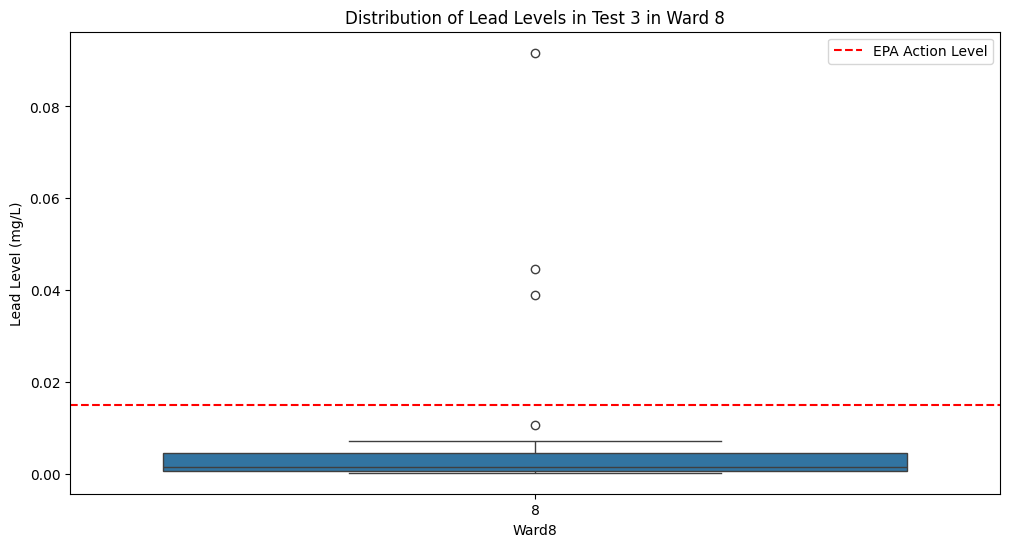

In [3]:
import matplotlib.pyplot as plt

for i in range (1, 9):
    warded = flint["Ward"] == i
    flintward = flint[warded]
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Ward', y='Pb Bottle 3 in mg/L', data=flintward)
    plt.axhline(y=0.015, color='r', linestyle='--', label='EPA Action Level')
    plt.legend()
    plt.title('Distribution of Lead Levels in Test 3 in Ward ' + str(i))
    plt.xlabel('Ward' + str(i))
    plt.ylabel('Lead Level (mg/L)')
    plt.show()


**What, if any, conclusions can you draw about the lead situation in the different wards? What do the points outside of the box plots represent?**

<font size=+2>&#9999;</font> Based on these boxplots, most lead levels are below the EPA Action Level (red dashed line) across all wards. The points above the boxplots represent outliers - specific samples with unusually high lead concentrations compared to other samples in their ward. Wards 1, 2, 3, 6, 8, and 9 have concerning outliers that exceed the EPA threshold, with Ward 5 having the highest outlier at nearly 0.09 mg/L.

In the space below, type in your key learnings from this activity.

<font size="+2">&#9999;</font> From this activity, I learned how to effectively transform water testing data from parts per billion (ppb) to milligrams per liter (mg/L) by dividing by 1000, making it easier to compare with EPA guidelines. I created boxplots with Seaborn to visualize lead contamination across different wards in Flint, and understood how to interpret outliers that exceed safety thresholds. This analysis revealed that while most samples fell below the EPA action level of 0.015 mg/L, several wards had concerning outliers that would require targeted intervention.